In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [62]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [63]:
df.head()

,Category,Resume,Companies
0,Data Science,Skills * Programming Languages: Python (pandas...,Acme Corporation
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Smith & Co.
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Johnson Enterprises
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Apex Innovations
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Global Solutions Inc.


In [64]:
df.shape

(962, 3)

# Exploring Categories and Companies

In [65]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

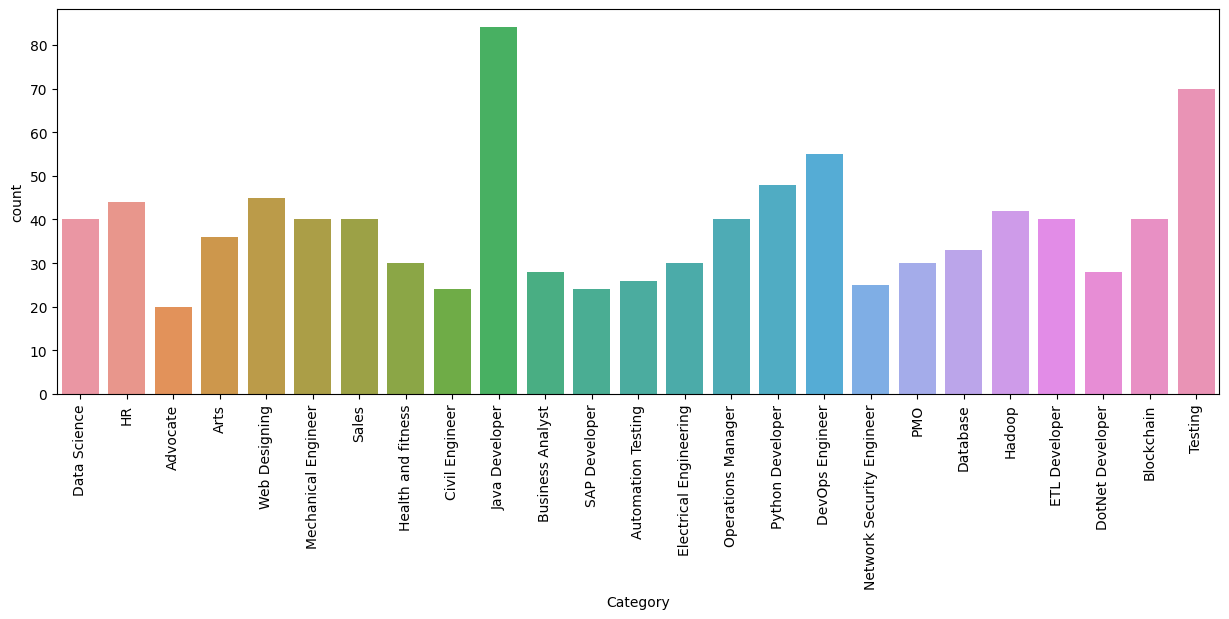

In [66]:
df['Category'].value_counts()
plt.figure(figsize=(15,5))

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

# Use 'Category_encoded' for countplot
sns.countplot(x=df['Category'])
plt.xticks(rotation=90)
plt.show()

In [67]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

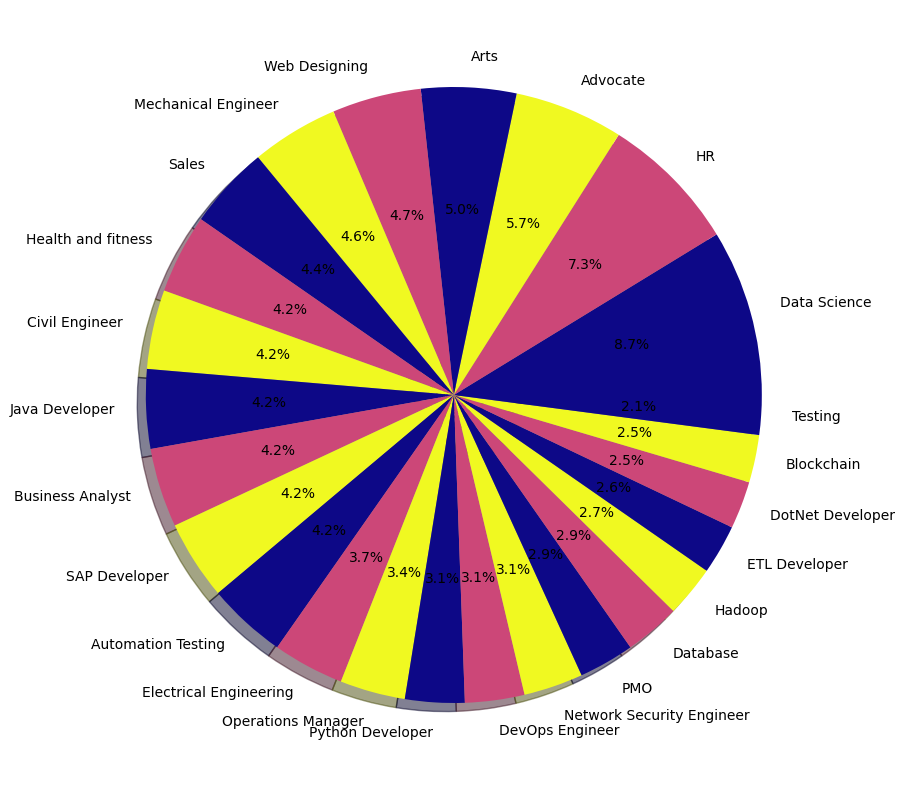

In [68]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [69]:
df['Companies'].value_counts()

Quantum Enterprises         25
Dynamic Innovations         23
Innovate Now Corporation    21
Alpha Technologies          20
Horizon Technologies        20
                            ..
Alpha Corporation            2
Dynamic Solutions            2
Phoenix Corporation          2
Horizon Innovations          2
Spark Corporation            2
Name: Companies, Length: 143, dtype: int64

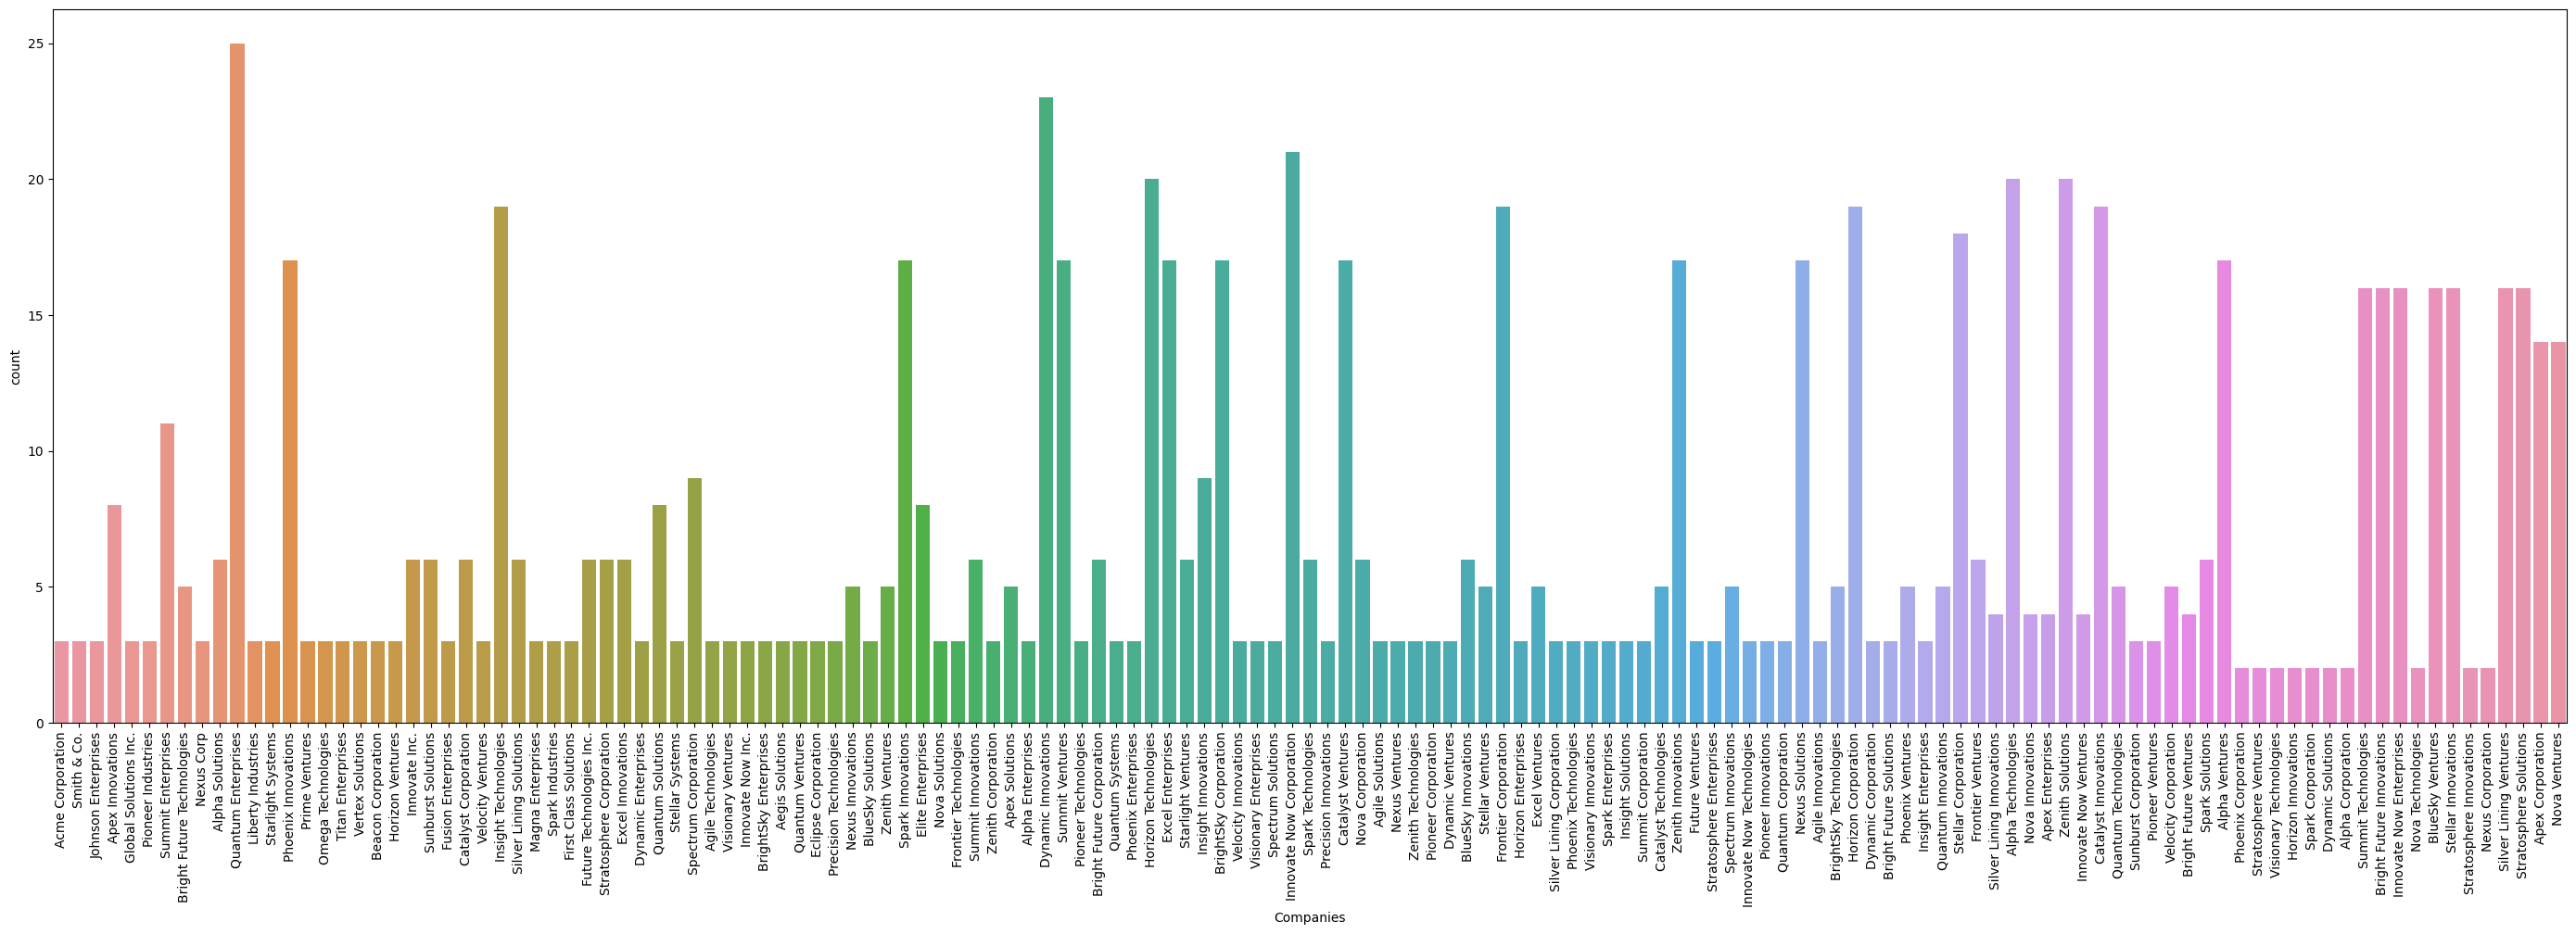

In [70]:
df['Companies'].value_counts()
plt.figure(figsize=(35,10))

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Companies_encoded'] = le.fit_transform(df['Companies'])

sns.countplot(x=df['Companies'])
plt.xticks(rotation=90)
plt.show()

# Exploring Resume

In [71]:
df['Category'][0]

'Data Science'

In [72]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning the resume by removing hashtags, urls, symbols etc.,

In [73]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [74]:
cleanResume("my portfolio website is given at http://valiant-coder.react.orvm and you can see it and email to me @gmail.com")

'my portfolio website is given at and you can see it and email to me '

In [75]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [76]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# Converting words into categorical values

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [78]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [79]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [80]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# Vectorization using TF-IDF Vectorizer

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

# Splitting the dataset for training and testing

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [84]:
X_train.shape

(769, 7351)

In [85]:
X_test.shape

(193, 7351)

# Training the model

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [87]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [88]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [89]:
myresume = """John Doe
123 Main Street
Anytown, USA, 12345
johndoe@email.com
(123) 456-7890

Objective:
Motivated and detail-oriented recent graduate with a Bachelor of Science in Computer Science, eager to begin a career in DevOps engineering. Possess strong foundational knowledge in cloud computing, automation, and software development. Seeking an opportunity to apply academic learning and gain hands-on experience in a dynamic DevOps environment.

Education:

Bachelor of Science in Computer Science
Anytown University, Anytown, USA
Graduated: May 2023
Skills:

Proficient in programming languages such as Python, Java, and Bash
Basic understanding of Linux system administration and shell scripting
Familiarity with cloud computing platforms including AWS, Azure, and Google Cloud
Version control systems such as Git and SVN
Basic knowledge of containerization tools like Docker
Understanding of CI/CD concepts and tools like Jenkins
Strong analytical and problem-solving skills
Excellent communication and teamwork abilities
Projects:
Continuous Integration Pipeline

Developed a basic CI pipeline using Jenkins for automated testing and deployment of a web application.
Integrated version control with Git to trigger build jobs upon code commits.
Utilized Docker to containerize the application for consistent deployment environments.
Infrastructure Provisioning with Terraform

Created infrastructure as code (IaC) templates using Terraform to provision AWS resources.
Deployed virtual machines, networking configurations, and storage solutions using Terraform scripts.
Managed infrastructure changes efficiently and maintained version control for infrastructure configurations.
Internship Experience:
DevOps Intern
Tech Solutions Inc., Anytown, USA
June 2022 - August 2022

Assisted in the setup and maintenance of development, testing, and production environments.
Participated in the deployment and monitoring of applications on AWS and Azure cloud platforms.
Contributed to the automation of routine tasks using scripting languages like Python and Bash.
Worked closely with senior DevOps engineers to troubleshoot issues and optimize system performance.
Academic Projects:
Automated Deployment Script

Developed a Python script to automate the deployment of applications on multiple servers.
Utilized SSH for remote server access and executed deployment commands across multiple hosts.
Containerized Microservices Application

Designed and deployed a microservices-based application using Docker containers.
Orchestrated the deployment and scaling of containerized services using Docker Compose.
Certifications:

AWS Certified Cloud Practitioner (Expected 2024)
Azure Fundamentals (Expected 2024)
Languages:

English (Native)
Spanish (Intermediate)
References:
Available upon request.
"""

# Job Role Prediction and Top 10 Recruiting Companies for the same. 

In [90]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Analyst",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category: \n", category_name)

print('\n')
##print(prediction_id)

import pandas as pd

from collections import Counter

data_required = pd.read_csv('UpdatedResumeDataSet.csv')

predicted_role = category_name

print(predicted_role, '\n')

matching_roles = data_required[data_required['Category'] == predicted_role]

company_names = matching_roles['Companies'].tolist()

company_names

company_counts = Counter(company_names)

# Get the top 10 most frequent companies
top_companies = company_counts.most_common(10)

# Print the top 10 companies and their counts
print(f"Top 10 companies in which the candidate can get recruited for '{predicted_role}' role are:")
for company, count in top_companies:
    print(f"{company}")

Predicted Category: 
 DevOps Engineer


DevOps Engineer 

Top 10 companies in which the candidate can get recruited for 'DevOps Engineer' role are:
Zenith Innovations
BrightSky Corporation
Phoenix Innovations
Stratosphere Solutions
Alpha Ventures
Innovate Now Enterprises
Nexus Solutions
Dynamic Innovations
Horizon Corporation
Summit Technologies


In [92]:
import pickle

# Open the pickle file in read binary mode
with open("tfidf.pkl", "rb") as f:
    # Load the pickled data
    data = pickle.load(f)

# Check the type of the data
print(type(data))

# Print the data
print(data)

# Open the pickle file in read binary mode
with open("clf.pkl", "rb") as f:
    # Load the pickled data
    data = pickle.load(f)

# Check the type of the data
print(type(data))

# Print the data
print(data)

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
TfidfVectorizer(stop_words='english')
<class 'sklearn.multiclass.OneVsRestClassifier'>
OneVsRestClassifier(estimator=KNeighborsClassifier())
